# **START**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator , TransformerMixin

In [2]:
import sklearn
print('numpy version',np.__version__)
print('pandas version',pd.__version__)
print('sklearn version', sklearn.__version__)

numpy version 1.26.4
pandas version 2.2.3
sklearn version 1.2.2


In [3]:
bang = pd.read_csv('/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv')

In [4]:
bang.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **FEATURE ENGINEERING**

In [5]:
#
bang = bang.drop('society', axis = 1)

In [6]:
bang['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
bang

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
#
bang['BHK'] = bang['size'].str.extract('(\d+)', expand=True)

In [9]:
#
bang.drop('size', axis = 1, inplace = True)

In [10]:
bang.columns


Index(['area_type', 'availability', 'location', 'total_sqft', 'bath',
       'balcony', 'price', 'BHK'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

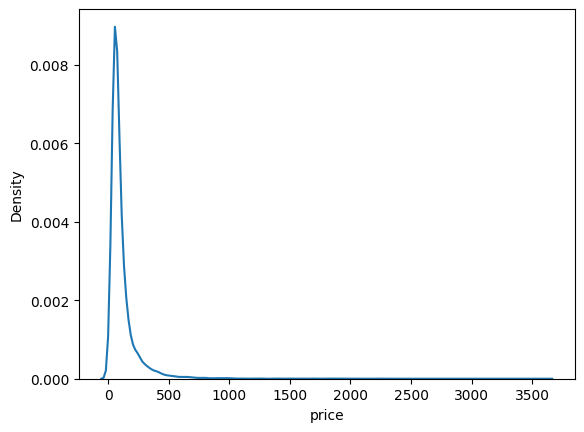

In [11]:
sns.kdeplot(data = bang, x = 'price')

In [12]:
#
bang['availability'] = bang['availability'].apply(lambda x: 'April' if 'apr' in str(x).lower() else x)

In [13]:
#
bang.loc[bang['availability'].str.contains('May', case=False, na=False), 'availability'] = 'May'
bang.loc[bang['availability'].str.contains('Aug', case=False, na=False), 'availability'] = 'Aug'
bang.loc[bang['availability'].str.contains('Nov', case=False, na=False), 'availability'] = 'Nov'
bang.loc[bang['availability'].str.contains('Dec', case=False, na=False), 'availability'] = 'Dec'
bang.loc[bang['availability'].str.contains('Jan', case=False, na=False), 'availability'] = 'Jan'
bang.loc[bang['availability'].str.contains('Jun', case=False, na=False), 'availability'] = 'other'
bang.loc[bang['availability'].str.contains('Jul', case=False, na=False), 'availability'] = 'other'
bang.loc[bang['availability'].str.contains('Sep', case=False, na=False), 'availability'] = 'other'
bang.loc[bang['availability'].str.contains('Oct', case=False, na=False), 'availability'] = 'other'
bang.loc[bang['availability'].str.contains('Feb', case=False, na=False), 'availability'] = 'other'
bang.loc[bang['availability'].str.contains('Mar', case=False, na=False), 'availability'] = 'other'

In [14]:
#
unique_categories = bang['location'].value_counts()
onefif_occurrence = unique_categories[unique_categories >50].index.tolist()
bang['location'] = bang['location'].apply(lambda x: 'other' if x not in onefif_occurrence else x)

In [15]:
bang['location'].value_counts()

location
other                       7250
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    213
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Chandapura                   100
Bellandur                     96
KR Puram                      91
Electronics City Phase 1      88
Hoodi                         88
Yeshwanthpur                  85
Begur Road                    84
Sarjapur                      82
Kasavanhalli                  80
Harlur                        79
Banashankari                  75
Hormavu                       74
Kengeri                       73
R

In [16]:
#
bang['total_sqft'] = bang['total_sqft'].str.extract('(\d+)', expand = True)

In [17]:
#
bang['total_sqft'] = bang['total_sqft'].astype(int)

In [18]:
#
df = bang

In [19]:
bang.shape

(13320, 8)

# **NEW**

In [20]:
df['BHK'] = df['BHK'].astype(float)

In [21]:
df[df['BHK'].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,area_type,availability,location,total_sqft,bath,balcony,price,BHK
579,Plot Area,Immediate Possession,Sarjapur Road,1200,NaN,NaN,34.185,NaN
1775,Plot Area,Immediate Possession,other,2000,NaN,NaN,124.000,NaN
2264,Plot Area,Immediate Possession,Banashankari,2400,NaN,NaN,460.000,NaN
2809,Plot Area,Immediate Possession,Sarjapur Road,1200,NaN,NaN,28.785,NaN
2862,Plot Area,Immediate Possession,other,1500,NaN,NaN,46.800,NaN
5333,Plot Area,Immediate Possession,other,2100,NaN,NaN,177.115,NaN
6423,Plot Area,Immediate Possession,Whitefield,2324,NaN,NaN,26.730,NaN
6636,Plot Area,Immediate Possession,Jigani,1500,NaN,NaN,25.490,NaN
6719,Plot Area,Immediate Possession,other,800,NaN,NaN,28.545,NaN
7680,Plot Area,Immediate Possession,Kasavanhalli,5000,NaN,NaN,400.000,NaN


In [22]:
df[df['availability'] == 'Immediate Possession'].count()

area_type       16
availability    16
location        16
total_sqft      16
bath             0
balcony          0
price           16
BHK              0
dtype: int64

In [23]:
# null values :- bath = 73, balcony = 609, bhk = 16 , availability = Immediate Possession has 16 nulls in bath .balcony and bhk.
df['room_density'] = df['total_sqft']/df['BHK']

In [24]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,area_type,availability,location,total_sqft,bath,balcony,price,BHK,room_density
0,Super built-up Area,Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,528.00
1,Plot Area,Ready To Move,other,2600,5.0,3.0,120.00,4.0,650.00
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,480.00
3,Super built-up Area,Ready To Move,other,1521,3.0,1.0,95.00,3.0,507.00
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,600.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5.0,690.60
13316,Super built-up Area,Ready To Move,other,3600,5.0,NaN,400.00,4.0,900.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0,570.50
13318,Super built-up Area,other,other,4689,4.0,1.0,488.00,4.0,1172.25


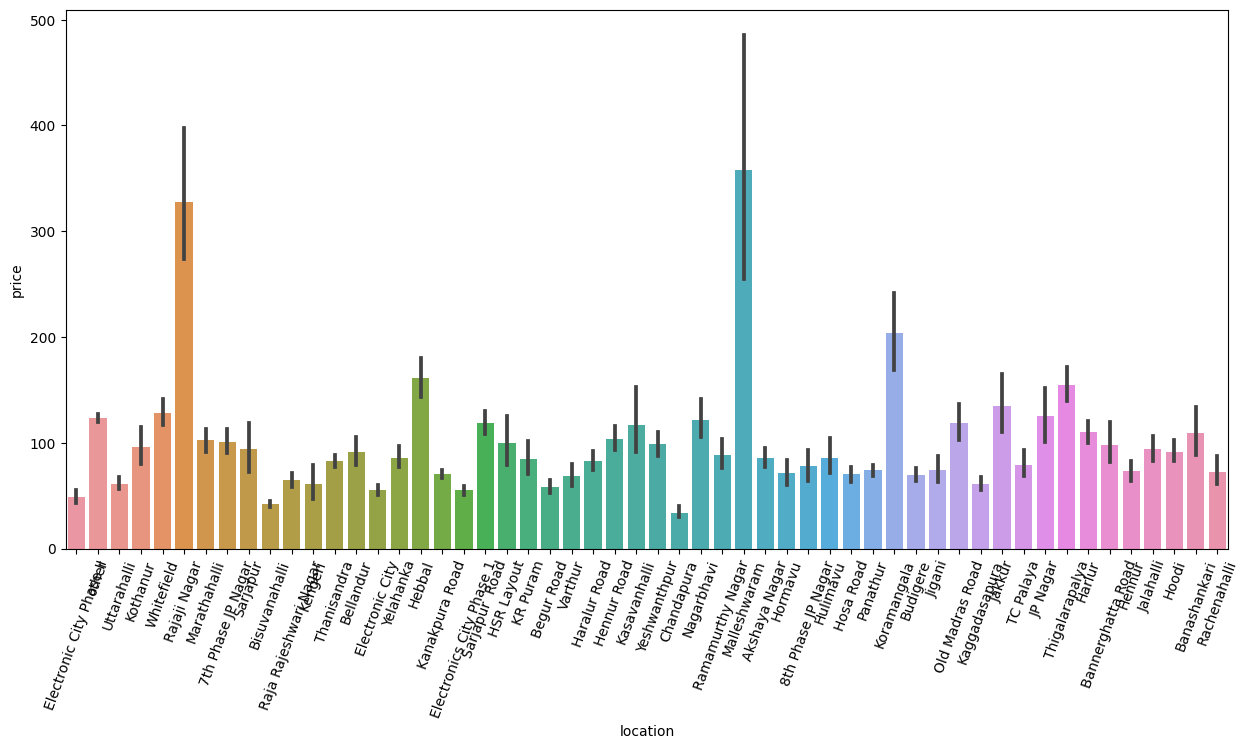

In [25]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x = 'location', y = 'price')
plt.xticks(rotation = 70)
plt.show()

In [26]:

df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [27]:
df['avg_price_per_sqft_loc'] = df.groupby('location')['price_per_sqft'].transform('mean')

In [28]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,room_density,price_per_sqft,avg_price_per_sqft_loc
0,Super built-up Area,Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,528.0,3699.810606,3895.275610
1,Plot Area,Ready To Move,other,2600,5.0,3.0,120.00,4.0,650.0,4615.384615,13582.186032
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0,480.0,4305.555556,4895.076545
3,Super built-up Area,Ready To Move,other,1521,3.0,1.0,95.00,3.0,507.0,6245.890861,13582.186032
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0,600.0,4250.000000,5699.354917


In [29]:
df['price_cat'] = pd.qcut(df['price_per_sqft'], 4, labels = ['low', 'medium', 'high' , 'very high'], duplicates='drop')

In [30]:
matrix = df.drop(columns=['area_type'	,'availability'	,'location', 'price_cat'])

<Axes: >

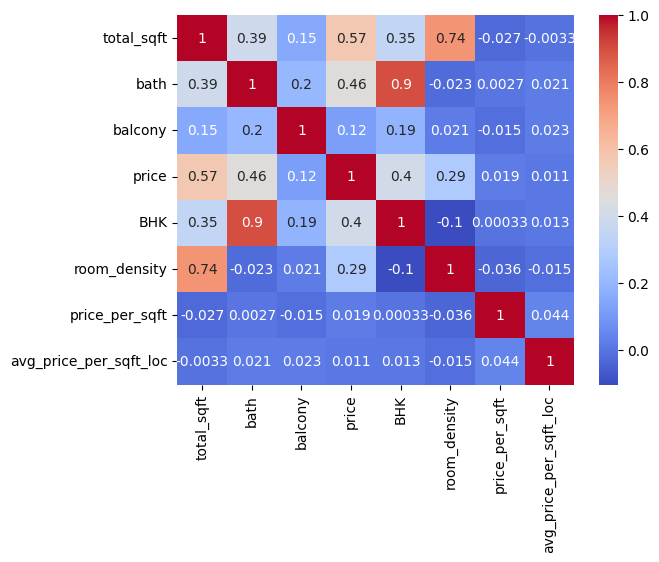

In [31]:
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm')

In [32]:
df = df.drop('price_per_sqft', axis = 1)

# **PIPELINES**

In [33]:
X = df.drop('price', axis =1)
y = df['price']

In [34]:
X.head(1)

,area_type,availability,location,total_sqft,bath,balcony,BHK,room_density,avg_price_per_sqft_loc,price_cat
0,Super built-up Area,Dec,Electronic City Phase II,1056,2.0,1.0,2.0,528.0,3895.27561,low


In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)

In [36]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10656 entries, 3411 to 7270
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   area_type               10656 non-null  object  
 1   availability            10656 non-null  object  
 2   location                10656 non-null  object  
 3   total_sqft              10656 non-null  int64   
 4   bath                    10591 non-null  float64 
 5   balcony                 10157 non-null  float64 
 6   BHK                     10642 non-null  float64 
 7   room_density            10642 non-null  float64 
 8   avg_price_per_sqft_loc  10656 non-null  float64 
 9   price_cat               10656 non-null  category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 843.1+ KB


##**COLUMN TRANSFORMATION**

In [37]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10656 entries, 3411 to 7270
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   area_type               10656 non-null  object  
 1   availability            10656 non-null  object  
 2   location                10656 non-null  object  
 3   total_sqft              10656 non-null  int64   
 4   bath                    10591 non-null  float64 
 5   balcony                 10157 non-null  float64 
 6   BHK                     10642 non-null  float64 
 7   room_density            10642 non-null  float64 
 8   avg_price_per_sqft_loc  10656 non-null  float64 
 9   price_cat               10656 non-null  category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 843.1+ KB


In [38]:
"""class OutlierRemoverIQR(BaseEstimator, TransformerMixin):

  def __init__(self , col = None, threshold = 1.5, use_indices = False):
    self.col = col
    self.threshold = threshold
    self.use_indices = use_indices
    self.kept_indices_ = None


  def fit(self , X , y = None):
    X = pd.DataFrame(X)

    if self.use_indices and self.col is not None:

      self.col = [X.columns[i] for i in self.col]


    if self.col is None:
      self.col = X.select_dtypes(include=[np.number]).columns.tolist()

    else:
      self.col = [col for col in self.col if X[col].dtype in [np.float64, np.int64]]



    self.Q1 = X[self.col].quantile(0.25)
    self.Q3 = X[self.col].quantile(0.75)
    self.IQR = self.Q3 - self.Q1

    return self



  def transform(self, X):

    X = pd.DataFrame(X).copy()

    mask = ((X[self.col] <= self.Q3 + self.threshold * self.IQR )
             & (X[self.col] >= self.Q1 - self.threshold * self.IQR))
    X_filtered = X[mask.all(axis=1)]
    self.kept_indices_ = X_filtered.index
    return X.reset_index(drop = True)

"""
1

1

In [39]:
class OutlierRemoverIQR(BaseEstimator, TransformerMixin):
    def __init__(self, col=None, threshold=1.5, use_indices=False):
        """
        Parameters:
        - col: List of column names or indices to check for outliers.
        - threshold: Multiplier for IQR to determine outlier bounds.
        - use_indices: If True, treat `col` as column indices instead of names.
        """
        self.col = col
        self.threshold = threshold
        self.use_indices = use_indices
        self.Q1 = None
        self.Q3 = None
        self.IQR = None
        self.kept_indices_ = None  # Track indices of rows kept after outlier removal

    def fit(self, X, y=None):
        """
        Compute IQR bounds for outlier detection.
        """
        X = pd.DataFrame(X)

        # Convert column indices to names if use_indices is True
        if self.use_indices and self.col is not None:
            self.col = [X.columns[i] for i in self.col]

        # If no columns are specified, use all numeric columns
        if self.col is None:
            self.col = X.select_dtypes(include=[np.number]).columns.tolist()

        # Compute Q1, Q3, and IQR for the specified columns
        self.Q1 = X[self.col].quantile(0.05)
        self.Q3 = X[self.col].quantile(0.95)
        self.IQR = self.Q3 - self.Q1

        return self

    def transform(self, X):
        """
        Remove rows containing outliers in any of the specified columns.
        """
        X = pd.DataFrame(X).copy()

        # Create a mask to identify rows without outliers
        mask = np.ones(len(X), dtype=bool)  # Start with all rows included
        for col in self.col:
            col_mask = (
                (X[col] >= self.Q1[col] - self.threshold * self.IQR[col]) &
                (X[col] <= self.Q3[col] + self.threshold * self.IQR[col])
            )
            mask &= col_mask  # Keep rows that satisfy the condition for all columns

        # Store the indices of the kept rows
        self.kept_indices_ = X[mask].index

        # Return the filtered DataFrame
        return X[mask].reset_index(drop=True)

In [40]:
out_rem = OutlierRemoverIQR(col=['room_density', 'avg_price_per_sqft_loc', 'total_sqft'])
xtrainfilt = out_rem.fit_transform(xtrain)
y_train_filtered = ytrain.loc[out_rem.kept_indices_]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [41]:
xtrainfilt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10586 entries, 0 to 10585
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   area_type               10586 non-null  object  
 1   availability            10586 non-null  object  
 2   location                10586 non-null  object  
 3   total_sqft              10586 non-null  int64   
 4   bath                    10535 non-null  float64 
 5   balcony                 10114 non-null  float64 
 6   BHK                     10586 non-null  float64 
 7   room_density            10586 non-null  float64 
 8   avg_price_per_sqft_loc  10586 non-null  float64 
 9   price_cat               10586 non-null  category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 755.0+ KB


In [42]:
import sklearn
sklearn.set_config(transform_output="pandas")

In [43]:
impute = ColumnTransformer(
     [
        ('bath',KNNImputer(),[4]),
         ('balcony', KNNImputer(),[5]),
         ('BHK', KNNImputer(), [6]),
         ('room_density', KNNImputer(), [7])

    ]  , remainder = 'passthrough'
)

In [44]:
log_trf = ColumnTransformer([
    ('log_trf',FunctionTransformer(func= np.log1p),[3,7,8])
    ], remainder= 'passthrough')

In [45]:
encode = ColumnTransformer([
    ('area_type', OneHotEncoder(drop='first',sparse_output = False, handle_unknown='infrequent_if_exist'),[6]),
    ('location' , OneHotEncoder(drop='first',sparse_output=False, handle_unknown= 'infrequent_if_exist') , [8]),
    ('price_cat', OneHotEncoder(drop='first',sparse_output=False , handle_unknown='infrequent_if_exist') , [9]),
    ('availability', OneHotEncoder(drop='first',sparse_output=False, handle_unknown='infrequent_if_exist') , [7])
] , remainder = 'passthrough')

##**PIPELINE**

In [46]:
pipe = Pipeline([
    ('impute', impute),
    ('log_trf', log_trf),
    ('encode', encode),
    ('model' , GradientBoostingRegressor())
])


In [47]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bath', KNNImputer(), [4]),
                                                 ('balcony', KNNImputer(), [5]),
                                                 ('BHK', KNNImputer(), [6]),
                                                 ('room_density', KNNImputer(),
                                                  [7])])),
                ('log_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_trf',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [3, 7, 8])])),
                ('encode',
                 ColumnTran...
                                                 ('location',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  [8]),
                                                 ('price_cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  [9]),
                                                 ('availability',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  [7])])),
                ('model', GradientBoostingRegressor())])

In [48]:
ypred = pipe.predict(xtest)

In [49]:
r2 = r2_score(ytest, ypred)
r2

0.8365204825345022

In [50]:
r2_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}")

Cross-validated R² scores: [0.82083156 0.80692885 0.74621505 0.8359513  0.73036506]
Mean R²: 0.7880583640818786


In [51]:
samp = pd.DataFrame([['Plot Area'	,'Dec'	,'Electronic City Phase II',	1056,	2.0	,1.0,	2.0,	528.0,	3895.275610,	'low']], columns = xtrain.columns)

In [52]:
pipe.predict(samp)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([36.40669487])

#**NEW WAY FOR COLUMN TRANSFORMER PRESERVING INDICES**

In [53]:
Xnew = df.drop(columns='price')
ynew = df['price']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, ynew , random_state=42, test_size=0.2)

In [55]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10656 entries, 3411 to 7270
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   area_type               10656 non-null  object  
 1   availability            10656 non-null  object  
 2   location                10656 non-null  object  
 3   total_sqft              10656 non-null  int64   
 4   bath                    10591 non-null  float64 
 5   balcony                 10157 non-null  float64 
 6   BHK                     10642 non-null  float64 
 7   room_density            10642 non-null  float64 
 8   avg_price_per_sqft_loc  10656 non-null  float64 
 9   price_cat               10656 non-null  category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 843.1+ KB


In [56]:
imputer = ColumnTransformer([
    ('stat0123','passthrough', [0,1,2,3]),
    ('knn4567', KNNImputer(), [4,5,6,7]),
    ('stat89', 'passthrough', [8,9])
], remainder='passthrough')

In [57]:
oheEnc = ColumnTransformer([
    ('ohe012', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), [0,1,2]),
    ('stat345678', 'passthrough', [3,4,5,6,7,8]),
    ('ohe9', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),[9])
], remainder = 'passthrough')

In [58]:
logt = ColumnTransformer ([
    ('stat012', 'passthrough', [0,1,2]),
    ('log_trans3',FunctionTransformer(func= np.log1p), [3]),
    ('stat456', 'passthrough', [4,5,6]),
    ('log_trans78',FunctionTransformer(func= np.log1p), [7,8]),
    ('stat9', 'passthrough', [9])
], remainder= 'passthrough')

In [59]:
scale = ColumnTransformer([
    ('againstat012', 'passthrough', [0,1,2]),
    ('scale3',MinMaxScaler(), [3]),
    ('againstat456', 'passthrough', [4,5,6]),
    ('scale78',MinMaxScaler(), [7,8]),
    ('againstat9', 'passthrough', [9])
], remainder= 'passthrough'
)

In [60]:
pipe2 = Pipeline([
    ('imp', imputer),
    ('enc', oheEnc),
    ('log', logt),
    ('scale', scale),
    ('model', GradientBoostingRegressor())
])

In [61]:
pipe2.fit(X_train, Y_train)

Pipeline(steps=[('imp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stat0123', 'passthrough',
                                                  [0, 1, 2, 3]),
                                                 ('knn4567', KNNImputer(),
                                                  [4, 5, 6, 7]),
                                                 ('stat89', 'passthrough',
                                                  [8, 9])])),
                ('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe012',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2]),
                                                 ('stat34567...
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7, 8]),
                                                 ('stat9', 'passthrough',
                                                  [9])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('againstat012', 'passthrough',
                                                  [0, 1, 2]),
                                                 ('scale3', MinMaxScaler(),
                                                  [3]),
                                                 ('againstat456', 'passthrough',
                                                  [4, 5, 6]),
                                                 ('scale78', MinMaxScaler(),
                                                  [7, 8]),
                                                 ('againstat9', 'passthrough',
                                                  [9])])),
                ('model', GradientBoostingRegressor())])

In [62]:
yp = pipe2.predict(X_test)

In [63]:
rsq = r2_score(Y_test, yp)
rsq

0.8326447019401659

In [64]:
samp = pd.DataFrame([['Super built-up Area' ,	'Dec'	,'Electronic City Phase II'	,1056,2.0	,1.0,2.0	,528.0	,3895.275610	,'low']], columns= X_train.columns)

In [65]:
samp2 = pd.DataFrame({
    'area_type': ['Super built-up'],
    'availability': ['Dec'],
    'location': ['Electronic City Phase II'],
    'total_sqft': [1056],
    'bath': [2],
    'balcony': [1],
    'BHK': [2],
    'room_density': [528],
    'avg_price_per_sqft_loc': [3895],
    'price_cat': ['low']
})

In [66]:
pipe2.predict(samp2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([37.59500262])

In [67]:
pipe2.predict(samp)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


37.59500262146859

In [68]:
r2_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}")

Cross-validated R² scores: [0.82144027 0.80570363 0.74727421 0.83463664 0.73276675]
Mean R²: 0.7883642992881207


In [69]:
names = scale.get_feature_names_out()

In [70]:
x=df.groupby('location')

In [71]:
x['price'].sum()

location
7th Phase JP Nagar           14977.920
8th Phase JP Nagar            4444.595
Akshaya Nagar                 5291.400
Banashankari                  8216.220
Bannerghatta Road            14899.030
Begur Road                    4886.550
Bellandur                     8754.560
Bisuvanahalli                 2127.980
Budigere                      3774.805
Chandapura                    3401.555
Electronic City              16601.660
Electronic City Phase II      6377.800
Electronics City Phase 1      4848.960
HSR Layout                    5309.000
Haralur Road                 11759.610
Harlur                        8680.160
Hebbal                       28464.240
Hennur                        4011.095
Hennur Road                  15733.145
Hoodi                         8065.220
Hormavu                       5262.525
Hosa Road                     5064.030
Hulimavu                      4467.780
JP Nagar                      9059.055
Jakkur                        9577.920
Jalahalli       

In [72]:
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(pipe2, file)